# NRAM Implementation

### -------------------- Ablation Study Implemenation--------------------

### Status
Completed
*   Base Framework
*   Code Cleanup
*   Neural Network model - MLP, LSTM, LSTM + MLP
*  Dataset 1
*  Not Gate
* Update model to run more gates
* Add read/write module
* Dataset 2 for read/write module 
* Dataset 3 for copy
* Dataset 4 for basic bucket sort
* Dataset 5 larger bucket sort list
* Dataset 6 larger bucket sort list

To-Do - Priority -2
* LSTM - check hidden states
* Check Final Error Summation


To-Do - Priority -3
* Gradient Clipping
* Gradient Noise
* Entropy
* Limit the value of log
* Enforcing Distribution Constraint


#### Errors
* Training
* Testing - same size problem
* Testing - different sized problem


#### 5 Different parameters
* Layer size
* Learning rate


#### Plot
Y-axis error
X-axis training iteration

### Ablation Study
After training, perturb the model (added noise, removed layers, etc.) or the data (added noise, shuffled input, etc). Show the impacts of the ablation on the three types of errors, for the 5 different hyper-parameter settings. Randomize the ablations and show aggregated error results (e.g., with histograms or boxplots)


## Initial Setup

### Import libraries

In [0]:
from __future__ import print_function

import numpy as np
import tensorflow as tf

from tensorflow.keras import layers

import matplotlib.pyplot as plt

tf.enable_eager_execution()

### Create Modules / Gates

In [0]:
def zeroModule(a, M):
    zero = np.asarray([0])
    return tf.one_hot(zero, M)

In [0]:
def oneModule(a, M):
    one = np.asarray([1])
    return tf.one_hot(one, M)

In [0]:
def twoModule(a, M):
    two = np.asarray([2])
    return tf.one_hot(two, M)

In [0]:
def incModule(a, M):
  return tf.roll(a, shift=1, axis=1)

In [0]:
def decModule(a, M):
  return tf.roll(a, shift=-1, axis=1)

In [0]:
# def incModule1(a, M):
#   aVal = tf.argmax(a, axis=1)
#   addVal = tf.mod(tf.add(aVal, 1), a.shape[1])
#   return tf.one_hot(addVal, a.shape[1])

In [0]:
def addModule(a, b, M):
  aVal = tf.argmax(a, axis=1)
  bVal = tf.argmax(b, axis=1)
  addVal = tf.mod(tf.add(aVal, bVal), a.shape[1])
  return tf.one_hot(addVal, a.shape[1])

In [0]:
# def addModule2(a, b, M):
#     bVal = tf.roll(b, shift=-M, axis=1)
    
#     rows = [tf.roll(b, shift=shift+1, axis=1) for shift in range(M)]
#     print(rows)
#     bVal = tf.stack(rows)
#     print(bVal)
#     bVal = tf.reshape(bVal, shape=[4,4,1])
#     print(bVal)
# #     return bVal
#     return tf.tensordot(a, bVal, axes=1)

In [0]:
# addModule2(tf.one_hot([2], M), tf.one_hot([1], M), M)

In [0]:
def subModule(a, b, M):
  aVal = tf.argmax(a, axis=1)
  bVal = tf.argmax(b, axis=1)
  subtractVal = tf.mod(tf.subtract(aVal, bVal), M)
  return tf.one_hot(subtractVal, M)

In [0]:
def lessModule(a, b, M):
  aVal = tf.argmax(a, axis=1)
  bVal = tf.argmax(b, axis=1)
  lessVal = tf.less(aVal, bVal)
  return tf.one_hot(tf.cast(lessVal, tf.int64), M)

In [0]:
def lessOrEqualThenModule(a, b, M):
  aVal = tf.argmax(a, axis=1)
  bVal = tf.argmax(b, axis=1)
  lessVal = tf.less_equal(aVal, bVal)
  return tf.one_hot(tf.cast(lessVal, tf.int64), M)

In [0]:
def equalModule(a, b, M):
  aVal = tf.argmax(a, axis=1)
  bVal = tf.argmax(b, axis=1)
  equalVal = tf.equal(aVal, bVal)
  return tf.one_hot(tf.cast(equalVal, tf.int64), M)

In [0]:
def minimumModule(a, b, M):
  aVal = tf.argmax(a, axis=1)
  bVal = tf.argmax(b, axis=1)
  minimumVal = tf.minimum(aVal, bVal)
  return tf.one_hot(tf.cast(minimumVal, tf.int64), M)

In [0]:
def maximumModule(a, b, M):
  aVal = tf.argmax(a, axis=1)
  bVal = tf.argmax(b, axis=1)
  maximumVal = tf.maximum(aVal, bVal)
  return tf.one_hot(tf.cast(maximumVal, tf.int64), M)

### Test Modules

In [0]:
#Note : Temporary M Values
M = 20

In [0]:
# incModule1(tf.one_hot([1, 2], M), M)

In [19]:
incModule(tf.one_hot([1, 2], M), M)

<tf.Tensor: id=7, shape=(2, 20), dtype=float32, numpy=
array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [20]:
decModule(tf.one_hot([4, 9], M), M)

<tf.Tensor: id=16, shape=(2, 20), dtype=float32, numpy=
array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [21]:
addModule(tf.one_hot([1, 2], M), tf.one_hot([1, 2], M), M)

<tf.Tensor: id=38, shape=(2, 20), dtype=float32, numpy=
array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [0]:
# addModule2(tf.one_hot([2], M), tf.one_hot([1], M), M)

In [23]:
addModule(np.array([[0., 0., 0., 0.5, 0.5]]), np.array([[0., 0., 0., 1., 0.]]), M)

<tf.Tensor: id=52, shape=(1, 5), dtype=float32, numpy=array([[0., 1., 0., 0., 0.]], dtype=float32)>

**Note: One hot of values greater than M is 0**

In [24]:
tf.one_hot([7, 8], M)

<tf.Tensor: id=58, shape=(2, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [25]:
subModule(tf.one_hot([4, 8], M), tf.one_hot([6, 7], M), M)

<tf.Tensor: id=80, shape=(2, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [26]:
incModule(tf.one_hot([4, 9], M), M)

<tf.Tensor: id=89, shape=(2, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [27]:
decModule(tf.one_hot([4, 9], M), M)

<tf.Tensor: id=98, shape=(2, 20), dtype=float32, numpy=
array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [28]:
lessModule(tf.one_hot([8, 5], M), tf.one_hot([6, 7], M), M)

<tf.Tensor: id=119, shape=(2, 20), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [29]:
lessOrEqualThenModule(tf.one_hot([8, 5], M), tf.one_hot([8, 7], M), M)

<tf.Tensor: id=140, shape=(2, 20), dtype=float32, numpy=
array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [30]:
equalModule(tf.one_hot([8, 5], M), tf.one_hot([8, 7], M), M)

<tf.Tensor: id=161, shape=(2, 20), dtype=float32, numpy=
array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [31]:
minimumModule(tf.one_hot([8, 5], M), tf.one_hot([8, 7], M), M)

<tf.Tensor: id=181, shape=(2, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

### Circuit Implementation

In [0]:
# def dotProduct(a, b):
#   print("a ",a.shape)
#   print("b ", b.shape)
#   if len(a.shape) == 2:
#     return tf.tensordot(a.T, b, axes=1)
#   else:
#     output = []
#     for i in range(a.shape[0]):
#       aT = tf.transpose(a[i])
#       output.append(tf.tensordot(aT, b[i], axes=1))
#     return tf.stack(output)

In [0]:
def dotProduct(a, b):
  if len(b.shape) > 1:
    print("error dotProduct shape: ", b.shape)
  aT = tf.transpose(a)
  aT = tf.reshape(aT, [a.shape[0],a.shape[2],a.shape[1]])
  return tf.tensordot(aT, b, axes=1)

In [34]:
a = np.array([[
    [1., 2., 3.],
    [4., 5., 6.],
]])

b = np.array([1., 0.])
dotProduct(a, b)


a = np.array([[
    [1., 2., 3.],
    [4., 5., 6.],
]])

b = np.array([0., 1.])
dotProduct(a, b)

<tf.Tensor: id=216, shape=(1, 3), dtype=float64, numpy=array([[4., 5., 6.]])>

In [0]:
# a = np.array([
#     [
#       [1., 2., 3.],
#       [4., 5., 6.],
#     ],
#     [
#       [1., 2., 3.],
#       [4., 5., 6.],
#     ],
# ])

# b = np.array([
#       [1., 0.],
#       [0., 1.]
#     ])
# dotProduct(a, b)

#### Gates List

In [0]:
gates = [incModule, decModule, addModule]

In [37]:
gates[0](tf.one_hot([1, 9], M), M)

<tf.Tensor: id=225, shape=(2, 20), dtype=float32, numpy=
array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

#### Gate Controller Output

Runs the input which is selected by controller values into the gate passed and returns the output from the gate

In [0]:
def gateOutput(gate, inputs, controllerValues, M):
  if(controllerValues.shape[0] > 1):
    gateInputA = dotProduct(inputs, controllerValues[0])
    gateInputB = dotProduct(inputs, controllerValues[1])
    output = gate(gateInputA, gateInputB, M)
  else:
    gateInputA = dotProduct(inputs, controllerValues[0])
    output = gate(gateInputA, M)
  
  return output

In [0]:
ip = np.array([[
  [1., 0., 0., 0., 0.],
  [0., 1., 0., 0., 0.],
  [0., 0., 0., 1., 0.],
  [0., 1., 0., 0., 0.]
 ]])

In [40]:
cp = np.array([[0., 0., 0., 1.],
              [0., 0., 1., 0.]])
cp.shape

(2, 4)

Run gate to check output - Adds ip 4th value with 3rd value

In [0]:
outputVal = gateOutput(gates[2], ip, cp, M)

In [42]:
outputVal

<tf.Tensor: id=271, shape=(1, 5), dtype=float32, numpy=array([[0., 0., 0., 0., 1.]], dtype=float32)>

In [43]:
tf.dtypes.cast(ip, tf.float32)

<tf.Tensor: id=274, shape=(1, 4, 5), dtype=float32, numpy=
array([[[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.]]], dtype=float32)>

For adding the output to the registers

In [44]:
tf.concat([ip, [outputVal]], axis=1)

<tf.Tensor: id=280, shape=(1, 5, 5), dtype=float64, numpy=
array([[[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.]]])>

In [45]:
zeroModule([], M)

<tf.Tensor: id=286, shape=(1, 20), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

#### Input Register

In [0]:
def registerValueModule(a):
    aVal = np.asarray([a])
    return tf.one_hot(aVal, M)

In [47]:
registerValueModule(2)

<tf.Tensor: id=292, shape=(1, 20), dtype=float32, numpy=
array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [0]:
registers = tf.concat([registerValueModule(0), registerValueModule(1), registerValueModule(3)], axis=0)

**Registers = [0,1,3]**

In [0]:
registers = tf.reshape(registers, shape=[1, registers.shape[0], registers.shape[1]])

In [50]:
registers

<tf.Tensor: id=312, shape=(1, 3, 20), dtype=float32, numpy=
array([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]]], dtype=float32)>

#### Update data

In [0]:
def runTimeStep(gates, registers, controllerValues_, registercontrollerValues_):
  updatedRegisters = registers
  for i in range(len(gates)):
    output = gateOutput(gates[i], updatedRegisters, controllerValues_[i], M)
    updatedRegisters = tf.concat([updatedRegisters, [output]], axis=1)

  output_registers = []

  for i in range(registers.shape[1]):
    output = dotProduct(updatedRegisters, registercontrollerValues_[i])
    output_registers.append(output)
  
  output_registers = tf.stack(output_registers, axis=1)
  
  return output_registers

**Circuit Testing 1**

In [52]:
# registers = [2, 1, 3]
registers = tf.concat([registerValueModule(2), registerValueModule(1), registerValueModule(3)], axis=0)
registers = tf.reshape(registers, shape=[1, registers.shape[0], registers.shape[1]])

print("Input registers: ", tf.argmax(registers, axis=2))

# Gatest -> Increment, Decrement, Addition
gates = [incModule, decModule, addModule]

# Increment input r1 -> decrement output o1 -> add output o2 + input r1
controllerValues_ = [
    [[0, 1, 0]],
    [[0, 0, 0, 1]],
    [[0, 0, 0, 0, 1],
     [0, 1, 0, 0, 0]]
]

# Save the input r2 -> output r0, input r0 -> output r1, last gate output -> output r2
registerControllerValues_ = [
    [0, 0, 1, 0, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1]
]

controllerValues = []
for value in controllerValues_:
  controllerValues.append(tf.dtypes.cast(value, tf.float32))

registerControllerValues = []
for value in registerControllerValues_:
  registerControllerValues.append(tf.dtypes.cast(value, tf.float32))

# Calling the function to run the complete circuit
output_registers = runTimeStep(gates, registers, controllerValues, registerControllerValues)

print("\noutput_registers:\n", output_registers)
print("\noutput_registers:\n", tf.argmax(output_registers, axis=2))

Input registers:  tf.Tensor([[2 1 3]], shape=(1, 3), dtype=int64)

output_registers:
 tf.Tensor(
[[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]], shape=(1, 3, 20), dtype=float32)

output_registers:
 tf.Tensor([[3 2 2]], shape=(1, 3), dtype=int64)


**Circuit Testing 2**

In [53]:
gates = [addModule]

controllerValues_ = [
    [
        [1, 0, 0],
        [0, 1, 0]
    ]
]

registerControllerValues_ = [
    [0, 0, 0, 1],
    [0, 1, 0, 0],
    [0, 0, 1, 0]
]


controllerValues = []
for value in controllerValues_:
  controllerValues.append(tf.dtypes.cast(value, tf.float32))

registerControllerValues = []
for value in registerControllerValues_:
  registerControllerValues.append(tf.dtypes.cast(value, tf.float32))

# First set of input values
registers = tf.concat([registerValueModule(1), registerValueModule(1), registerValueModule(3)], axis=0)
registers = tf.reshape(registers, shape=[1, registers.shape[0], registers.shape[1]])

print("Input register set 1: ", tf.argmax(registers, axis=2))

print("\nRunning input r0 , r1 -> add -> output r0")

# Calling the function to run the complete circuit
output_registers = runTimeStep(gates, registers, controllerValues, registerControllerValues)

print("\noutput_registers:\n", output_registers)
print("\noutput_registers:\n", tf.argmax(output_registers, axis=2))


# Second set of input values
registers = tf.concat([registerValueModule(2), registerValueModule(1), registerValueModule(3)], axis=0)
registers = tf.reshape(registers, shape=[1, registers.shape[0], registers.shape[1]])

print("\n\nInput register set 2: ", tf.argmax(registers, axis=2))

print("\nRunning input r0 , r1 -> add -> output r0")
# Calling the function to run the complete circuit
output_registers = runTimeStep(gates, registers, controllerValues, registerControllerValues)

print("\noutput_registers:\n", output_registers)
print("\noutput_registers:\n", tf.argmax(output_registers, axis=2))

Input register set 1:  tf.Tensor([[1 1 3]], shape=(1, 3), dtype=int64)

Running input r0 , r1 -> add -> output r0

output_registers:
 tf.Tensor(
[[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]], shape=(1, 3, 20), dtype=float32)

output_registers:
 tf.Tensor([[2 1 3]], shape=(1, 3), dtype=int64)


Input register set 2:  tf.Tensor([[2 1 3]], shape=(1, 3), dtype=int64)

Running input r0 , r1 -> add -> output r0

output_registers:
 tf.Tensor(
[[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]], shape=(1, 3, 20), dtype=float32)

output_registers:
 tf.Tensor([[3 1 3]], shape=(1, 3), dtype=int64)


### Memory

In [0]:
def readMemory(pointer, memory, M):
  # pointer -> 1,M
  # memory -> M, M
  # output -> 1, M
  val = tf.tensordot(pointer, memory, axes=1)
  return val

def registerModule(a, M):
    aVal = np.asarray([a])
    return tf.one_hot(aVal, M)

In [55]:
registers = []
for _ in range(10):
  registers.append(registerModule(_+2, 10))
registers = tf.concat(registers, axis=0)
print(registers)

pointer = np.array([[0., 0., 0., 0., 0., 0.5, 0.5, 0., 0., 0.]], dtype="float32")

print(pointer)

val = readMemory(pointer, registers, 10)

print(val)

tf.Tensor(
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(10, 10), dtype=float32)
[[0.  0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]]
tf.Tensor([[0.  0.  0.  0.  0.  0.  0.  0.5 0.5 0. ]], shape=(1, 10), dtype=float32)


In [0]:
def writeMemory(pointer, value, memory, M):
  # newValToWrite -> M, M
  # mask -> M, M
  # M:=(J−p)JT ·M+paT
  
  newValToWrite = tf.tensordot(tf.transpose(pointer), value, axes=1)

  J = np.ones([1,M], dtype="float32")
  erase = tf.transpose(J-pointer)
  
  mask = tf.tensordot(erase, J, axes=1)
  
  oldMemory = mask * memory

  return oldMemory + newValToWrite

In [57]:
registers = []
for _ in range(10):
  registers.append(registerModule(_, 10))
memory = tf.concat(registers, axis=0)
memory = np.array(memory, dtype="float32")
print(memory)

pointer = np.array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype="float32")
value    = np.array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype="float32")

outMemory = writeMemory(pointer, value, memory, 10)
print(outMemory)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
tf.Tensor(
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(10, 10), dtype=float32)


## NRAM Controller Model

#### NRAM Controller MLP Model

In [0]:
def gateOutputNN(gate, registers, controllerValues, M):
  if(len(controllerValues) > 1):
    gateInputA = dotProduct(registers, controllerValues[0][0])
    gateInputB = dotProduct(registers, controllerValues[1][0])
    output = gate(gateInputA, gateInputB, M)
  else:
    gateInputA = dotProduct(registers, controllerValues[0][0])
    output = gate(gateInputA, M)
  return output

In [0]:
# Handle extra b size
def dotProductMemory(a, b):
  aT = tf.transpose(a)
  aT = tf.reshape(aT, [a.shape[0],a.shape[2],a.shape[1]])
  return tf.tensordot(aT, b[0], axes=1)

In [0]:
def runTimeStepNN(gates, registers, memory, readModule, writeModule, controllerValues_, registercontrollerValues_):
  updatedRegisters = registers

  M = memory.shape[0]
  pointer = dotProductMemory(updatedRegisters, controllerValues_[0][0])
  value = readModule(pointer, memory, M)

  value= tf.reshape(value, shape=[value.shape[0], 1, value.shape[1]])
  updatedRegisters = tf.concat([updatedRegisters, value], axis=1)
  
  for i in range(len(gates)):
    output = gateOutputNN(gates[i], updatedRegisters, controllerValues_[i+1], M)
    output= tf.reshape(output, shape=[updatedRegisters.shape[0], 1, updatedRegisters.shape[2]])
    updatedRegisters = tf.concat([updatedRegisters, output], axis=1)
  
  # controllerValues_[-1] => [Pointer, Value]
  writePointer = dotProductMemory(updatedRegisters, controllerValues_[-1][0])
  writeValue = dotProductMemory(updatedRegisters, controllerValues_[-1][1])
  
  outputMemory = writeMemory(writePointer, writeValue, memory, M)
  writePointer = tf.reshape(writePointer, shape=[writePointer.shape[0], 1, writePointer.shape[1]])
  updatedRegisters = tf.concat([updatedRegisters, writePointer], axis=1)

  outputRegisters = []
  for i in range(registers.shape[1]):
    output = dotProduct(updatedRegisters, registercontrollerValues_[i][0])
    outputRegisters.append(output)
  
  outputRegisters = tf.stack(outputRegisters, axis=1)
  
  return outputRegisters, outputMemory

In [0]:
class NRAMController(tf.keras.Model):
   def __init__(self, hidden_dimensions=100, gateControllerDimensions=[[3], [4,4]], registerControllerDimensions=[4, 4, 4]):
      super(NRAMController, self).__init__()
      self.Hidden1 = tf.keras.layers.Dense(hidden_dimensions, input_shape=(3,), use_bias=True, activation="relu")
      self.Hidden2 = tf.keras.layers.Dense(hidden_dimensions, input_shape=(hidden_dimensions,), use_bias=True, activation="relu")

      self.gateControllerDimensions = gateControllerDimensions
      self.registerControllerDimensions = registerControllerDimensions

      # Gate Inputs Controller values 
      self.GateControllerOutput = []
      for gateControllerValue in gateControllerDimensions:
        GateController = []
        for dim in gateControllerValue:
          GateController.append(tf.keras.layers.Dense(dim, input_shape=(hidden_dimensions,), use_bias=True, activation="softmax"))
        self.GateControllerOutput.append(GateController)

      # Register Output Controller Values
      self.RegisterController = []
      for i in registerControllerDimensions:
        self.RegisterController.append(tf.keras.layers.Dense(i, input_shape=(hidden_dimensions,), use_bias=True, activation="softmax"))

      # Complete status
      self.CompletedStatus = tf.keras.layers.Dense(1, input_shape=(hidden_dimensions,), use_bias=True, activation="sigmoid")
   
   def call(self, input_registers, noise=True, std=0.2):
      if noise:
        noise = tf.random_normal(shape=tf.shape(input_registers), mean=0.0, stddev=std, dtype=tf.float32) 

      # hidden layers
      hidden1 = self.Hidden1(input_registers + noise)
      hidden2 = self.Hidden2(hidden1)
      
      # To get gate controller values
      gateControllerOutput = []
      for i in range(len(self.gateControllerDimensions)):
        gateController = []
        for j in range(len(self.gateControllerDimensions[i])):
          gateController.append(self.GateControllerOutput[i][j](hidden2))
        gateControllerOutput.append(gateController)
         
      registerControllerOutput = []
      # To get register controller values
      for i in range(len(self.registerControllerDimensions)):
        registerControllerOutput.append(self.RegisterController[i](hidden2))

      # final completed status
      completed = self.CompletedStatus(hidden2)

      return gateControllerOutput, registerControllerOutput, completed

#### Example Implementation

In [0]:
# Creating instance of the contoller network
nramController = NRAMController(hidden_dimensions=100, gateControllerDimensions=[[3], [4], [5], [6,6], [7, 7]], registerControllerDimensions=[8, 8, 8]);

In [63]:
# Running the controller
gateControllerOutput, registerControllerOutput, completedStatus = nramController(tf.Variable(tf.ones((1,3))))

print("\nThe output from the neural network controller without training \n")
gateControllerOutput

Instructions for updating:
Colocations handled automatically by placer.

The output from the neural network controller without training 



[[<tf.Tensor: id=1008, shape=(1, 3), dtype=float32, numpy=array([[0.44022593, 0.2975741 , 0.2622    ]], dtype=float32)>],
 [<tf.Tensor: id=1035, shape=(1, 4), dtype=float32, numpy=array([[0.27519014, 0.1696738 , 0.33980897, 0.21532708]], dtype=float32)>],
 [<tf.Tensor: id=1062, shape=(1, 5), dtype=float32, numpy=
  array([[0.20400953, 0.2092249 , 0.18850106, 0.18783507, 0.21042942]],
        dtype=float32)>],
 [<tf.Tensor: id=1089, shape=(1, 6), dtype=float32, numpy=
  array([[0.18405376, 0.1462692 , 0.20086302, 0.1618315 , 0.14738093,
          0.15960157]], dtype=float32)>,
  <tf.Tensor: id=1116, shape=(1, 6), dtype=float32, numpy=
  array([[0.21463425, 0.13449165, 0.15592538, 0.20369886, 0.16413145,
          0.12711848]], dtype=float32)>],
 [<tf.Tensor: id=1143, shape=(1, 7), dtype=float32, numpy=
  array([[0.10078876, 0.10288695, 0.14148661, 0.1483204 , 0.17346333,
          0.15579917, 0.17725474]], dtype=float32)>,
  <tf.Tensor: id=1170, shape=(1, 7), dtype=float32, numpy=
  arr

In [64]:
registerControllerOutput

[<tf.Tensor: id=1197, shape=(1, 8), dtype=float32, numpy=
 array([[0.12791342, 0.1040596 , 0.12766568, 0.1309569 , 0.11372884,
         0.14952108, 0.1515189 , 0.09463557]], dtype=float32)>,
 <tf.Tensor: id=1224, shape=(1, 8), dtype=float32, numpy=
 array([[0.12045148, 0.11251584, 0.10329159, 0.11209089, 0.14969651,
         0.10152152, 0.15163606, 0.148796  ]], dtype=float32)>,
 <tf.Tensor: id=1251, shape=(1, 8), dtype=float32, numpy=
 array([[0.16480851, 0.13576938, 0.11383788, 0.10948278, 0.14544214,
         0.07642563, 0.12507276, 0.12916087]], dtype=float32)>]

In [65]:
completedStatus

<tf.Tensor: id=1278, shape=(1, 1), dtype=float32, numpy=array([[0.43353134]], dtype=float32)>

##### Input Controller Values is the output of NN being applied to the circuit for one time step

In [66]:
r_ = []
for _ in range(M):
  r_.append(registerModule(_, M))
memory = tf.concat(r_, axis=0)
memory = np.array(memory, dtype="float32")
print(memory)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.

In [67]:
gates = [incModule, decModule, addModule]

# First set of input values
registers = tf.concat([registerValueModule(0), registerValueModule(0), registerValueModule(0)], axis=0)
registers = tf.reshape(registers, shape=[1, registers.shape[0], registers.shape[1]])

print("Input register set 1: ", tf.argmax(registers, axis=2))

print("\nRunning input r0 -> increment -> output r0")

# Calling the function to run the complete circuit
output_registers, memory = runTimeStepNN(gates, registers, memory, readMemory, writeMemory, gateControllerOutput, registerControllerOutput)

print("\nOutput Memory")
print(memory)

print("\noutput_registers:\n", output_registers)
print("\noutput_registers:\n", tf.argmax(output_registers, axis=2))

Input register set 1:  tf.Tensor([[0 0 0]], shape=(1, 3), dtype=int64)

Running input r0 -> increment -> output r0

Output Memory
tf.Tensor(
[[0.8086182  0.12135672 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.07002515]
 [0.12627545 0.85645884 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.01726569]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.  

In [68]:
memory

<tf.Tensor: id=1624, shape=(20, 20), dtype=float32, numpy=
array([[0.8086182 , 0.12135672, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.07002515],
       [0.12627545, 0.85645884, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01726569],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        

#### NRAM Controller with LSTM V1

In [0]:
class NRAMControllerLSTM(tf.keras.Model):
  def __init__(self, hidden_dimensions=256, gateControllerDimensions=[[3], [4,4]], registerControllerDimensions=[4, 4, 4]):
    super(NRAMControllerLSTM, self).__init__()
    self.lstm = layers.LSTM(hidden_dimensions, return_sequences=True, return_state=True)

    self.gateControllerDimensions = gateControllerDimensions
    self.registerControllerDimensions = registerControllerDimensions

    # Gate Inputs Controller values 
    self.GateControllerOutput = []
    for gateControllerValue in gateControllerDimensions:
      GateController = []
      for dim in gateControllerValue:
        GateController.append(tf.keras.layers.Dense(dim, input_shape=(hidden_dimensions,), use_bias=True, activation="softmax"))
      self.GateControllerOutput.append(GateController)

    # Register Output Controller Values
    self.RegisterController = []
    for i in registerControllerDimensions:
      self.RegisterController.append(tf.keras.layers.Dense(i, input_shape=(hidden_dimensions,), use_bias=True, activation="softmax"))

    self.CompletedStatus = tf.keras.layers.Dense(1, input_shape=(hidden_dimensions,), use_bias=True, activation="sigmoid")

  def call(self, input_registers, noise=True, std=0.2):
    if noise:
      noise = tf.random_normal(shape=tf.shape(input_registers), mean=0.0, stddev=std, dtype=tf.float32) 

    inputValue = tf.reshape(input_registers+noise, shape=[input_registers.shape[0], 1, input_registers.shape[1]])
    lstm_output, state_h, state_c  = self.lstm(inputValue)

    # To get gate controller values
    gateControllerOutput = []
    for i in range(len(self.gateControllerDimensions)):
      gateController = []
      for j in range(len(self.gateControllerDimensions[i])):
        o = self.GateControllerOutput[i][j](lstm_output)
        gateController.append(tf.reshape(o, shape=[o.shape[0],o.shape[2]]))
      gateControllerOutput.append(gateController)

    registerControllerOutput = []
    # To get register controller values
    for i in range(len(self.registerControllerDimensions)):
      o = self.RegisterController[i](lstm_output)
      registerControllerOutput.append(tf.reshape(o, shape=[o.shape[0],o.shape[2]]))

    # final completed status
    completed = self.CompletedStatus(lstm_output)

    return gateControllerOutput, registerControllerOutput, completed

In [70]:
# Creating instance of the contoller network
nramControllerLSTM = NRAMControllerLSTM();

# Running the controller
gateControllerOutput, registerControllerOutput, completedStatus = nramControllerLSTM(tf.Variable(tf.ones((1,3))))

print("\nThe output from the neural network controller without training \n")
gateControllerOutput


The output from the neural network controller without training 



[[<tf.Tensor: id=2085, shape=(1, 3), dtype=float32, numpy=array([[0.32156003, 0.3442802 , 0.3341598 ]], dtype=float32)>],
 [<tf.Tensor: id=2130, shape=(1, 4), dtype=float32, numpy=array([[0.24446747, 0.2522748 , 0.24786426, 0.25539348]], dtype=float32)>,
  <tf.Tensor: id=2175, shape=(1, 4), dtype=float32, numpy=array([[0.25187477, 0.2436377 , 0.252695  , 0.25179252]], dtype=float32)>]]

In [71]:
registerControllerOutput

[<tf.Tensor: id=2220, shape=(1, 4), dtype=float32, numpy=array([[0.24378645, 0.24765843, 0.2518428 , 0.2567123 ]], dtype=float32)>,
 <tf.Tensor: id=2265, shape=(1, 4), dtype=float32, numpy=array([[0.24990238, 0.24104416, 0.2620822 , 0.24697126]], dtype=float32)>,
 <tf.Tensor: id=2310, shape=(1, 4), dtype=float32, numpy=array([[0.2513038 , 0.24488401, 0.25342005, 0.25039214]], dtype=float32)>]

#### NRAM Controller with LSTM V2

In [0]:
class NRAMControllerLSTM2(tf.keras.Model):
   def __init__(self, hidden_dimensions=256, gateControllerDimensions=[[3], [4,4]], registerControllerDimensions=[4, 4, 4]):
      super(NRAMControllerLSTM2, self).__init__()
#       self.lstmHidden = layers.CuDNNLSTM(hidden_dimensions, return_sequences=True, return_state=True)
      self.lstmHidden = layers.LSTM(hidden_dimensions, return_sequences=True, return_state=True)

      self.gateControllerDimensions = gateControllerDimensions
      self.registerControllerDimensions = registerControllerDimensions

      # Gate Inputs Controller values 
      self.GateControllerOutput = []
      self.SoftmaxGateOutput= []
      for gateControllerValue in gateControllerDimensions:
        GateController = []
        SoftmaxLayer = []
        for dim in gateControllerValue:
          GateController.append(layers.LSTM(dim, return_sequences=True, return_state=True))
          SoftmaxLayer.append(layers.Activation("softmax"))
        self.GateControllerOutput.append(GateController)
        self.SoftmaxGateOutput.append(SoftmaxLayer)

      # Register Output Controller Values
      self.RegisterController = []
      self.SoftmaxRegisterOutput = []
      for i in registerControllerDimensions:
        self.RegisterController.append(layers.LSTM(i, return_sequences=True, return_state=True))
        self.SoftmaxRegisterOutput.append(layers.Activation("softmax"))

      self.CompletedStatus = tf.keras.layers.Dense(1, input_shape=(hidden_dimensions,), use_bias=True, activation="sigmoid")
   
   def call(self, input_registers, noise=True, std=0.2):
      if noise:
        noise = tf.random_normal(shape=tf.shape(input_registers), mean=0.0, stddev=std, dtype=tf.float32) 

      inputValue = tf.reshape(input_registers+noise, shape=[input_registers.shape[0], 1, input_registers.shape[1]])
      lstm_output, state_h, state_c  = self.lstmHidden(inputValue)

      # To get gate controller values
      gateControllerOutput = []
      for i in range(len(self.gateControllerDimensions)):
        gateController = []
        for j in range(len(self.gateControllerDimensions[i])):
          o, h, c = self.GateControllerOutput[i][j](lstm_output)
          gateController.append(self.SoftmaxGateOutput[i][j](tf.reshape(o, shape=[o.shape[0],o.shape[2]])))
        gateControllerOutput.append(gateController)

      registerControllerOutput = []
      # To get register controller values
      for i in range(len(self.registerControllerDimensions)):
        o, h, c = self.RegisterController[i](lstm_output)
        registerControllerOutput.append(self.SoftmaxRegisterOutput[i](tf.reshape(o, shape=[o.shape[0],o.shape[2]])))

      # final completed status
      completed = self.CompletedStatus(lstm_output)

      return gateControllerOutput, registerControllerOutput, completed

In [73]:
# Example with one gate and 3 input/output registers
outputVals = [3, 4, 4, 4]

# Creating instance of the contoller network
nramControllerLSTM = NRAMControllerLSTM2();

# Running the controller
gateControllerOutput, registerControllerOutput, completedStatus = nramControllerLSTM(tf.Variable(tf.ones((1,3))))

print("\nThe output from the neural network controller without training \n")
gateControllerOutput


The output from the neural network controller without training 



[[<tf.Tensor: id=3032, shape=(1, 3), dtype=float32, numpy=array([[0.33267674, 0.33270875, 0.33461452]], dtype=float32)>],
 [<tf.Tensor: id=3363, shape=(1, 4), dtype=float32, numpy=array([[0.2500108 , 0.25182557, 0.24852599, 0.24963763]], dtype=float32)>,
  <tf.Tensor: id=3694, shape=(1, 4), dtype=float32, numpy=array([[0.25093105, 0.25107977, 0.2501939 , 0.24779528]], dtype=float32)>]]

In [74]:
registerControllerOutput

[<tf.Tensor: id=4025, shape=(1, 4), dtype=float32, numpy=array([[0.24997859, 0.24890551, 0.25041002, 0.2507059 ]], dtype=float32)>,
 <tf.Tensor: id=4356, shape=(1, 4), dtype=float32, numpy=array([[0.25044888, 0.2483501 , 0.24935898, 0.25184205]], dtype=float32)>,
 <tf.Tensor: id=4687, shape=(1, 4), dtype=float32, numpy=array([[0.24818528, 0.2500495 , 0.25191295, 0.24985224]], dtype=float32)>]

## Dataset Implementation

In [0]:
# To select dataset
dataSelected = 5

##### Bucketsort

In [76]:
# Python3 program to sort an array 
# using bucket sort 
def insertionSort(b): 
	for i in range(1, len(b)): 
		up = b[i] 
		j = i - 1
		while j >=0 and b[j] > up: 
			b[j + 1] = b[j] 
			j -= 1
		b[j + 1] = up	 
	return b	 
			
def bucketSort(x, M): 
	arr = [] 
	slot_num = 3 # 10 means 10 slots, each 
				# slot's size is 0.1 
	for i in range(slot_num): 
		arr.append([]) 
		
	# Put array elements in different buckets 
	for j in x: 
		index_b = int((slot_num * j)/M) 
		arr[index_b].append(j) 
	
	# Sort individual buckets 
	for i in range(slot_num): 
		arr[i] = insertionSort(arr[i]) 
	
	# concatenate the result 
	k = 0
	for i in range(slot_num): 
		for j in range(len(arr[i])): 
			x[k] = arr[i][j] 
			k += 1
	return x, arr

# Driver Code 
x = [1, 4, 3, 6, 
	2, 5, 7, 9, 8] 
print("Sorted Array is") 
print(bucketSort(x, 10))


# Driver Code 
x = [1, 14, 13, 6, 
	12, 15, 7, 19, 8] 
print("Sorted Array is") 
print(bucketSort(x, 20))

Sorted Array is
([1, 2, 3, 4, 5, 6, 7, 8, 9], [[1, 2, 3], [4, 5, 6], [7, 8, 9]])
Sorted Array is
([1, 6, 7, 8, 12, 13, 14, 15, 19], [[1, 6], [7, 8, 12, 13], [14, 15, 19]])


##### Test data Generator

In [0]:
# # Initalize the memory
# inputMemory = np.zeros((M,M), dtype="float32")
# targetMemory = np.zeros((M,M), dtype="float32")

# # Pointer to the buckets
# p1 = 8
# p2 = 10
# p3 = 12

# # Bucket 1
# inputMemory[0] = registerModule(p1, M)
# targetMemory[0] = registerModule(p1, M)

# # Bucket 2
# inputMemory[1] = registerModule(p2, M)
# targetMemory[1] = registerModule(p2, M)

# # Bucket 3
# inputMemory[2] = registerModule(p3, M)
# targetMemory[2] = registerModule(p3, M)

# # We can give sorted values into the function bucketSort
# _, bucketsArray = bucketSort(np.arange(1, 20), 20)
# # print(bucketsArray)


# print("\nindex:")
# randIndex = np.arange(3)
# np.random.shuffle(randIndex)
# print(randIndex)

# for i in range(3):
#   # memory index starts from 4 to 6 -> 4,5,6
#   bucketIndex = randIndex[i]
#   val = np.random.choice(bucketsArray[bucketIndex], 1)[0]
#   print(val)
#   inputMemory[i+4] = registerModule(val, M)
#   targetMemory[i+4] = registerModule(val, M)
  
#   if bucketIndex == 0:
#     #bucket1
#     targetMemory[p1] = registerModule(val, M)
#   elif bucketIndex == 1:
#     #bucket2
#     targetMemory[p2] = registerModule(val, M)    
#   elif bucketIndex == 2:
#     #bucket3
#     targetMemory[p3] = registerModule(val, M)

# print(np.argmax(inputMemory, axis=1))
# print(np.argmax(targetMemory, axis=1))

In [0]:
# ## [20x20] -> 3 Pointers -> 4 Input Elements -> 2 element in each bucket -> 3,  1,4,  1,2, 1,2, 1,2
# # Initalize the memory
# inputMemory = np.zeros((M,M), dtype="float32")
# targetMemory = np.zeros((M,M), dtype="float32")

# # Pointer to the buckets
# p1 = 9
# p2 = 12
# p3 = 15

# # Bucket 1
# inputMemory[0] = registerModule(p1, M)
# targetMemory[0] = registerModule(p1, M)

# # Bucket 2
# inputMemory[1] = registerModule(p2, M)
# targetMemory[1] = registerModule(p2, M)

# # Bucket 3
# inputMemory[2] = registerModule(p3, M)
# targetMemory[2] = registerModule(p3, M)

# # We can give sorted values into the function bucketSort
# _, bucketsArray = bucketSort(np.arange(1, 20), 20)
# # print(bucketsArray)


# print("\nindex:")
# randIndex = np.arange(3)
# np.random.shuffle(randIndex)
# print(randIndex)

# for i in range(3):
#   # memory index starts from 4 to 6 -> 4,5,6,7
#   bucketIndex = randIndex[i]
#   val = np.random.choice(bucketsArray[bucketIndex], 1)[0]
#   print(val)
#   inputMemory[i+4] = registerModule(val, M)
#   targetMemory[i+4] = registerModule(val, M)
  
#   if bucketIndex == 0:
#     #bucket1
#     targetMemory[p1] = registerModule(val, M)
#   elif bucketIndex == 1:
#     #bucket2
#     targetMemory[p2] = registerModule(val, M)    
#   elif bucketIndex == 2:
#     #bucket3
#     targetMemory[p3] = registerModule(val, M)

# # 4th element
# print("\nindex:")
# randIndex = np.arange(3)
# np.random.shuffle(randIndex)
# print(randIndex)

# for i in range(1):
#   # memory index starts from 4 to 6 -> 4,5,6,7
#   bucketIndex = randIndex[i]
#   val = np.random.choice(bucketsArray[bucketIndex], 1)[0]
#   print(val)
#   inputMemory[i+7] = registerModule(val, M)
#   targetMemory[i+7] = registerModule(val, M)
  
#   if bucketIndex == 0:
#     #bucket1
#     targetMemory[p1+1] = registerModule(val, M)
#   elif bucketIndex == 1:
#     #bucket2
#     targetMemory[p2+1] = registerModule(val, M)    
#   elif bucketIndex == 2:
#     #bucket3
#     targetMemory[p3+1] = registerModule(val, M)

# print(np.argmax(inputMemory, axis=1))
# print(np.argmax(targetMemory, axis=1))

In [0]:
# ## [20x20] -> 3 Pointers -> 6 Input Elements -> 2 element in each bucket -> 3,  1,6,  1,2, 1,2, 1,2
# # Initalize the memory
# inputMemory = np.zeros((M,M), dtype="float32")
# targetMemory = np.zeros((M,M), dtype="float32")

# # Pointer to the buckets
# p1 = 11
# p2 = 14
# p3 = 17

# # Bucket 1
# inputMemory[0] = registerModule(p1, M)
# targetMemory[0] = registerModule(p1, M)

# # Bucket 2
# inputMemory[1] = registerModule(p2, M)
# targetMemory[1] = registerModule(p2, M)

# # Bucket 3
# inputMemory[2] = registerModule(p3, M)
# targetMemory[2] = registerModule(p3, M)

# # We can give sorted values into the function bucketSort
# _, bucketsArray = bucketSort(np.arange(1, 20), 20)
# # print(bucketsArray)


# print("\nindex:")
# randIndex = np.arange(3)
# np.random.shuffle(randIndex)
# print(randIndex)

# for i in range(3):
#   # memory index starts from 4 to 6 -> 4,5,6,7
#   bucketIndex = randIndex[i]
#   val = np.random.choice(bucketsArray[bucketIndex], 1)[0]
#   print(val)
#   inputMemory[i+4] = registerModule(val, M)
#   targetMemory[i+4] = registerModule(val, M)
  
#   if bucketIndex == 0:
#     #bucket1
#     targetMemory[p1] = registerModule(val, M)
#   elif bucketIndex == 1:
#     #bucket2
#     targetMemory[p2] = registerModule(val, M)    
#   elif bucketIndex == 2:
#     #bucket3
#     targetMemory[p3] = registerModule(val, M)

# # 4th element
# print("\nindex:")
# randIndex = np.arange(3)
# np.random.shuffle(randIndex)
# print(randIndex)

# for i in range(3):
#   # memory index starts from 4 to 6 -> 4,5,6,7
#   bucketIndex = randIndex[i]
#   val = np.random.choice(bucketsArray[bucketIndex], 1)[0]
#   print(val)
#   inputMemory[i+7] = registerModule(val, M)
#   targetMemory[i+7] = registerModule(val, M)
  
#   if bucketIndex == 0:
#     #bucket1
#     targetMemory[p1+1] = registerModule(val, M)
#   elif bucketIndex == 1:
#     #bucket2
#     targetMemory[p2+1] = registerModule(val, M)    
#   elif bucketIndex == 2:
#     #bucket3
#     targetMemory[p3+1] = registerModule(val, M)

# print(np.argmax(inputMemory, axis=1))
# print(np.argmax(targetMemory, axis=1))

### Dataset 4

In [0]:
def repeat(size, inputSet, targetSet):
  inputRepeatSet = []
  targetRepeatSet = []
  
  for _ in range(size):
    arrIndex = np.arange(len(inputSet))
    np.random.shuffle(arrIndex)
    
    for j in arrIndex:
      inputRepeatSet.append(inputSet[j])
      targetRepeatSet.append(targetSet[j])

  return inputRepeatSet, targetRepeatSet

def dataset4(repeats, M):
  inputSet = []
  targetSet = []
  
  for _ in range(repeats):
    # Initalize the memory
    inputMemory = np.zeros((M,M), dtype="float32")
    targetMemory = np.zeros((M,M), dtype="float32")

    # Pointer to the buckets
    p1 = 8
    p2 = 10
    p3 = 12

    # Bucket 1
    inputMemory[0] = registerModule(p1, M)
    targetMemory[0] = registerModule(p1, M)

    # Bucket 2
    inputMemory[1] = registerModule(p2, M)
    targetMemory[1] = registerModule(p2, M)

    # Bucket 3
    inputMemory[2] = registerModule(p3, M)
    targetMemory[2] = registerModule(p3, M)

    # We can give sorted values into the function bucketSort
    _, bucketsArray = bucketSort(np.arange(1, 20), 20)
    # print(bucketsArray)


    print("\nindex:")
    randIndex = np.arange(3)
    np.random.shuffle(randIndex)
    print(randIndex)

    for i in range(3):
      # memory index starts from 4 to 6 -> 4,5,6
      bucketIndex = randIndex[i]
      val = np.random.choice(bucketsArray[bucketIndex], 1)[0]
      inputMemory[i+4] = registerModule(val, M)
      targetMemory[i+4] = registerModule(val, M)

      if bucketIndex == 0:
        #bucket1
        targetMemory[p1] = registerModule(val, M)
      elif bucketIndex == 1:
        #bucket2
        targetMemory[p2] = registerModule(val, M)    
      elif bucketIndex == 2:
        #bucket3
        targetMemory[p3] = registerModule(val, M)

    print(np.argmax(inputMemory, axis=1))
    print(np.argmax(targetMemory, axis=1))

    inputSet.append(inputMemory)
    targetSet.append(targetMemory)
  return inputSet, targetSet

In [81]:
inputSet, targetSet = dataset4(50, M)


index:
[2 1 0]
[ 8 10 12  0 15  8  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 8 10 12  0 15  8  4  0  4  0  8  0 15  0  0  0  0  0  0  0]

index:
[1 0 2]
[ 8 10 12  0  7  6 18  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 8 10 12  0  7  6 18  0  6  0  7  0 18  0  0  0  0  0  0  0]

index:
[2 1 0]
[ 8 10 12  0 14 11  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 8 10 12  0 14 11  3  0  3  0 11  0 14  0  0  0  0  0  0  0]

index:
[1 2 0]
[ 8 10 12  0  9 15  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 8 10 12  0  9 15  4  0  4  0  9  0 15  0  0  0  0  0  0  0]

index:
[2 0 1]
[ 8 10 12  0 15  1  8  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 8 10 12  0 15  1  8  0  1  0  8  0 15  0  0  0  0  0  0  0]

index:
[1 2 0]
[ 8 10 12  0  7 14  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 8 10 12  0  7 14  1  0  1  0  7  0 14  0  0  0  0  0  0  0]

index:
[2 1 0]
[ 8 10 12  0 18  7  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 8 10 12  0 18  7  2  0  2  0  7  0 18  0  0  0  0  0  0  0]

index:
[2 0 1]
[ 8 

In [0]:
# dataSelected = 4
if dataSelected == 4:
  ## Generate dataset
  inputSet, targetSet = dataset4(500, M)
  inputTrainSet, targetTrainSet = repeat(4, inputSet[0:250], targetSet[0:250])

  print(len(inputTrainSet))
  print(inputSet[0].shape)
  print(targetSet[0].shape)

  inputTestSet, targetTestSet = repeat(4, inputSet[250:500], targetSet[250:500])
  
  print(len(inputTestSet))
  # for (input_data, target_data) in zip(inputSet, targetSet):
  #   print(input_data)
  #   print(target_data)

### Dataset 5

In [0]:
def repeat(size, inputSet, targetSet):
  inputRepeatSet = []
  targetRepeatSet = []
  
  for _ in range(size):
    arrIndex = np.arange(len(inputSet))
    np.random.shuffle(arrIndex)
    
    for j in arrIndex:
      inputRepeatSet.append(inputSet[j])
      targetRepeatSet.append(targetSet[j])

  return inputRepeatSet, targetRepeatSet

def dataset5(repeats, M):
  inputSet = []
  targetSet = []
  
  for _ in range(repeats):
    ## [20x20] -> 3 Pointers -> 4 Input Elements -> 2 element in each bucket -> 3,  1,4,  1,2, 1,2, 1,2
    # Initalize the memory
    inputMemory = np.zeros((M,M), dtype="float32")
    targetMemory = np.zeros((M,M), dtype="float32")

    # Pointer to the buckets
    p1 = 9
    p2 = 12
    p3 = 15

    # Bucket 1
    inputMemory[0] = registerModule(p1, M)
    targetMemory[0] = registerModule(p1, M)

    # Bucket 2
    inputMemory[1] = registerModule(p2, M)
    targetMemory[1] = registerModule(p2, M)

    # Bucket 3
    inputMemory[2] = registerModule(p3, M)
    targetMemory[2] = registerModule(p3, M)

    # We can give sorted values into the function bucketSort
    _, bucketsArray = bucketSort(np.arange(1, 20), 20)
    # print(bucketsArray)


    print("\nindex:")
    randIndex = np.arange(3)
    np.random.shuffle(randIndex)
    print(randIndex)

    for i in range(3):
      # memory index starts from 4 to 6 -> 4,5,6,7
      bucketIndex = randIndex[i]
      val = np.random.choice(bucketsArray[bucketIndex], 1)[0]
      print(val)
      inputMemory[i+4] = registerModule(val, M)
      targetMemory[i+4] = registerModule(val, M)

      if bucketIndex == 0:
        #bucket1
        targetMemory[p1] = registerModule(val, M)
      elif bucketIndex == 1:
        #bucket2
        targetMemory[p2] = registerModule(val, M)    
      elif bucketIndex == 2:
        #bucket3
        targetMemory[p3] = registerModule(val, M)

    # 4th element
    print("\nindex:")
    randIndex = np.arange(3)
    np.random.shuffle(randIndex)
    print(randIndex)

    for i in range(1):
      # memory index starts from 4 to 6 -> 4,5,6,7
      bucketIndex = randIndex[i]
      val = np.random.choice(bucketsArray[bucketIndex], 1)[0]
      print(val)
      inputMemory[i+7] = registerModule(val, M)
      targetMemory[i+7] = registerModule(val, M)

      if bucketIndex == 0:
        #bucket1
        targetMemory[p1+1] = registerModule(val, M)
      elif bucketIndex == 1:
        #bucket2
        targetMemory[p2+1] = registerModule(val, M)    
      elif bucketIndex == 2:
        #bucket3
        targetMemory[p3+1] = registerModule(val, M)

    print(np.argmax(inputMemory, axis=1))
    print(np.argmax(targetMemory, axis=1))

    inputSet.append(inputMemory)
    targetSet.append(targetMemory)
  return inputSet, targetSet

In [84]:
# dataSelected = 5
if dataSelected == 5:
  ## Generate dataset
  inputSet, targetSet = dataset5(500, M)
  inputTrainSet, targetTrainSet = repeat(20, inputSet[0:40], targetSet[0:40])

  print(len(inputTrainSet))
  print(inputSet[0].shape)
  print(targetSet[0].shape)

  inputTestSet, targetTestSet = repeat(2, inputSet[100:500], targetSet[100:500])

  # for (input_data, target_data) in zip(inputSet, targetSet):
  #   print(input_data)
  #   print(target_data)


index:
[2 1 0]
15
13
2

index:
[1 2 0]
10
[ 9 12 15  0 15 13  2 10  0  0  0  0  0  0  0  0  0  0  0  0]
[ 9 12 15  0 15 13  2 10  0  2  0  0 13 10  0 15  0  0  0  0]

index:
[0 2 1]
5
16
9

index:
[1 2 0]
12
[ 9 12 15  0  5 16  9 12  0  0  0  0  0  0  0  0  0  0  0  0]
[ 9 12 15  0  5 16  9 12  0  5  0  0  9 12  0 16  0  0  0  0]

index:
[0 1 2]
6
12
14

index:
[1 0 2]
11
[ 9 12 15  0  6 12 14 11  0  0  0  0  0  0  0  0  0  0  0  0]
[ 9 12 15  0  6 12 14 11  0  6  0  0 12 11  0 14  0  0  0  0]

index:
[2 1 0]
18
7
6

index:
[0 2 1]
2
[ 9 12 15  0 18  7  6  2  0  0  0  0  0  0  0  0  0  0  0  0]
[ 9 12 15  0 18  7  6  2  0  6  2  0  7  0  0 18  0  0  0  0]

index:
[2 1 0]
15
8
6

index:
[0 2 1]
6
[ 9 12 15  0 15  8  6  6  0  0  0  0  0  0  0  0  0  0  0  0]
[ 9 12 15  0 15  8  6  6  0  6  6  0  8  0  0 15  0  0  0  0]

index:
[0 1 2]
3
9
18

index:
[2 1 0]
19
[ 9 12 15  0  3  9 18 19  0  0  0  0  0  0  0  0  0  0  0  0]
[ 9 12 15  0  3  9 18 19  0  3  0  0  9  0  0 18 19  0  0  0]

ind

### Dataset 6

In [0]:
def repeat(size, inputSet, targetSet):
  inputRepeatSet = []
  targetRepeatSet = []
  
  for _ in range(size):
    arrIndex = np.arange(len(inputSet))
    np.random.shuffle(arrIndex)
    
    for j in arrIndex:
      inputRepeatSet.append(inputSet[j])
      targetRepeatSet.append(targetSet[j])

  return inputRepeatSet, targetRepeatSet

def dataset6(repeats, M):
  inputSet = []
  targetSet = []
  
  for _ in range(repeats):
    ## [20x20] -> 3 Pointers -> 6 Input Elements -> 2 element in each bucket -> 3,  1,6,  1,2, 1,2, 1,2
    # Initalize the memory
    inputMemory = np.zeros((M,M), dtype="float32")
    targetMemory = np.zeros((M,M), dtype="float32")

    # Pointer to the buckets
    p1 = 11
    p2 = 14
    p3 = 17

    # Bucket 1
    inputMemory[0] = registerModule(p1, M)
    targetMemory[0] = registerModule(p1, M)

    # Bucket 2
    inputMemory[1] = registerModule(p2, M)
    targetMemory[1] = registerModule(p2, M)

    # Bucket 3
    inputMemory[2] = registerModule(p3, M)
    targetMemory[2] = registerModule(p3, M)

    # We can give sorted values into the function bucketSort
    _, bucketsArray = bucketSort(np.arange(1, 20), 20)
    # print(bucketsArray)


    print("\nindex:")
    randIndex = np.arange(3)
    np.random.shuffle(randIndex)
    print(randIndex)

    for i in range(3):
      # memory index starts from 4 to 6 -> 4,5,6,7
      bucketIndex = randIndex[i]
      val = np.random.choice(bucketsArray[bucketIndex], 1)[0]
      print(val)
      inputMemory[i+4] = registerModule(val, M)
      targetMemory[i+4] = registerModule(val, M)

      if bucketIndex == 0:
        #bucket1
        targetMemory[p1] = registerModule(val, M)
      elif bucketIndex == 1:
        #bucket2
        targetMemory[p2] = registerModule(val, M)    
      elif bucketIndex == 2:
        #bucket3
        targetMemory[p3] = registerModule(val, M)

    # 4th element
    print("\nindex:")
    randIndex = np.arange(3)
    np.random.shuffle(randIndex)
    print(randIndex)

    for i in range(3):
      # memory index starts from 4 to 6 -> 4,5,6,7
      bucketIndex = randIndex[i]
      val = np.random.choice(bucketsArray[bucketIndex], 1)[0]
      print(val)
      inputMemory[i+7] = registerModule(val, M)
      targetMemory[i+7] = registerModule(val, M)

      if bucketIndex == 0:
        #bucket1
        targetMemory[p1+1] = registerModule(val, M)
      elif bucketIndex == 1:
        #bucket2
        targetMemory[p2+1] = registerModule(val, M)    
      elif bucketIndex == 2:
        #bucket3
        targetMemory[p3+1] = registerModule(val, M)

    print(np.argmax(inputMemory, axis=1))
    print(np.argmax(targetMemory, axis=1))

    inputSet.append(inputMemory)
    targetSet.append(targetMemory)
  return inputSet, targetSet

In [0]:
# dataSelected = 6

In [0]:
if dataSelected == 6:
  ## Generate dataset
  inputSet, targetSet = dataset6(500, M)
  inputTrainSet, targetTrainSet = repeat(4, inputSet[0:250], targetSet[0:250])

  print(len(inputTrainSet))
  print(inputSet[0].shape)
  print(targetSet[0].shape)

  inputTestSet, targetTestSet = repeat(4, inputSet[250:500], targetSet[250:500])
  # for (input_data, target_data) in zip(inputSet, targetSet):
  #   print(input_data)
  #   print(target_data)

## Train Model

### Training Function

In [0]:
optimizer = tf.train.AdamOptimizer(
    learning_rate=0.001,
    beta1=0.9,
    beta2=0.999,
    epsilon=1e-08
)

In [0]:
def trainModel(inputTrainSet, targetTrainSet, inputTestSet, targetTestSet, gates, nramController, readMemory, writeMemory, epochs=2, max_timesteps=5, min_error=1e-5):
  loss_history = []

  for epoch in range(epochs):
      batch = 0
      for (input_data, target_data, test_input_data, test_target_data) in zip(inputTrainSet, targetTrainSet, inputTestSet, targetTestSet, ):
          cost = 0
          total_prob_complete = 0
          prob_incomplete = 1
          
          with tf.GradientTape() as tape:
            registers = tf.concat([registerValueModule(0), registerValueModule(0), registerValueModule(0)], axis=0)
            registers = tf.reshape(registers, shape=[1, registers.shape[0], registers.shape[1]])
            memory = input_data
           
            for timestep in range(max_timesteps):
              register_data = []
              registersNumpy = registers.numpy()
              for i in range(registersNumpy.shape[1]):
                register_data.append(registersNumpy[0][i][0])
              register_data = np.array([register_data], dtype="float32")
              
              gateControllerOutput, registerControllerOutput, status = nramController(register_data)
              output_registers, memory = runTimeStepNN(gates, registers, memory, readMemory, writeMemory, gateControllerOutput, registerControllerOutput)
              
              registers = output_registers
              
              # update the probability when its the last time step
              if timestep == max_timesteps:
                  prob_complete = 1 - total_prob_complete
              else:
                  prob_complete = status * prob_incomplete

              # Accumulate the probability that a result has been produced.
              total_prob_complete += prob_complete

              # update the probability for incomplete status
              prob_incomplete *= 1 - status

              # Cost for this timestep.
              cost_current_timestep_registers = 0

              # Add epsilon to every log to avoid having inf in costs.
              epsilon = tf.constant(1e-35, shape=[output_registers.shape[0], output_registers.shape[2]])

              for r in range(memory.shape[0]):
                  y = target_data[r]
                  yPredicted = memory[r]
                  loss = tf.math.reduce_sum((y * tf.math.log(tf.math.add(yPredicted, epsilon))), axis=1)
                  cost_current_timestep_registers += tf.reshape(loss, [loss.shape[0], 1])

              cost_now = prob_complete * cost_current_timestep_registers
              cost -= cost_now
            final_cost = tf.math.reduce_sum(cost)
          
          # store the loss history 
          loss_history.append(final_cost.numpy())

          # fetch the trainable variables
          variables = nramController.variables

          # calculate the gradient
          grads = tape.gradient(final_cost, variables)

          # update the weights of the network
          optimizer.apply_gradients(zip(grads, variables), global_step=tf.train.get_or_create_global_step())
        
          batch += 1
          print("\nEpoch:", epoch, " batch:", batch, " final cost:", final_cost.numpy())
          
          if final_cost.numpy() < min_error:
            print("\nExit: Epoch:", epoch, " batch:", batch, " final cost:", final_cost.numpy())
            return loss_history, nramController
          
  return loss_history, nramController

### Run the model

##### LSTM Model

In [90]:
## Run me
gateDimensions = [[3], [4], [5], [6], [7], [8,8], [9,9], [10], [11,11], [12,12], [13,13], [14,14], [15,15], [16,16]]
registerDimensions = [17, 17, 17]

nramController = NRAMControllerLSTM(hidden_dimensions=256, gateControllerDimensions=gateDimensions, registerControllerDimensions=registerDimensions)

gates = [zeroModule, oneModule, twoModule, incModule, addModule, subModule, decModule, lessModule, lessOrEqualThenModule, equalModule, minimumModule, maximumModule]

loss_history, model = trainModel(inputTrainSet, targetTrainSet, inputTestSet, targetTestSet, gates, nramController, readMemory, writeMemory, min_error=1e-5)


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.

Epoch: 0  batch: 1  final cost: 187.12358

Epoch: 0  batch: 2  final cost: 141.68747

Epoch: 0  batch: 3  final cost: 121.261375

Epoch: 0  batch: 4  final cost: 141.53749

Epoch: 0  batch: 5  final cost: 143.4032

Epoch: 0  batch: 6  final cost: 138.39972

Epoch: 0  batch: 7  final cost: 157.60194

Epoch: 0  batch: 8  final cost: 136.6112

Epoch: 0  batch: 9  final cost: 136.3944

Epoch: 0  batch: 10  final cost: 129.83386

Epoch: 0  batch: 11  final cost: 146.63449

Epoch: 0  batch: 12  final cost: 129.09076

Epoch: 0  batch: 13  final cost: 144.56442

Epoch: 0  batch: 14  final cost: 122.88615

Epoch: 0  batch: 15  final cost: 178.02931

Epoch: 0  batch: 16  final cost: 174.41464

Epoch: 0  batch: 17  final cost: 122.52749

Epoch: 0  batch: 18  final cost: 168.57208

Epoch: 0  batch: 19  final cost: 167.45529

Epoch: 0  batch: 20  final cost: 164.9624

Epoch: 0  batch: 21  final cost: 135.3206

Epoch: 0  

##### LSTM V2

In [91]:
## Run me

gateDimensions = [[3], [4], [5], [6], [7], [8,8], [9,9], [10], [11,11], [12,12], [13,13], [14,14], [15,15], [16,16]]
registerDimensions = [17, 17, 17]

nramController2 = NRAMControllerLSTM2(hidden_dimensions=256, gateControllerDimensions=gateDimensions, registerControllerDimensions=registerDimensions)

gates = [zeroModule, oneModule, twoModule, incModule, addModule, subModule, decModule, lessModule, lessOrEqualThenModule, equalModule, minimumModule, maximumModule]

loss_history2, model2 = trainModel(inputTrainSet, targetTrainSet, inputTestSet, targetTestSet, gates, nramController2, readMemory, writeMemory, min_error=1e-5)



Epoch: 0  batch: 1  final cost: 184.81924

Epoch: 0  batch: 2  final cost: 137.69942

Epoch: 0  batch: 3  final cost: 115.8714

Epoch: 0  batch: 4  final cost: 128.24525

Epoch: 0  batch: 5  final cost: 123.89993

Epoch: 0  batch: 6  final cost: 113.85504

Epoch: 0  batch: 7  final cost: 124.57979

Epoch: 0  batch: 8  final cost: 101.61799

Epoch: 0  batch: 9  final cost: 82.79807

Epoch: 0  batch: 10  final cost: 81.80442

Epoch: 0  batch: 11  final cost: 79.66392

Epoch: 0  batch: 12  final cost: 56.298878

Epoch: 0  batch: 13  final cost: 59.422718

Epoch: 0  batch: 14  final cost: 39.072662

Epoch: 0  batch: 15  final cost: 54.52408

Epoch: 0  batch: 16  final cost: 45.658237

Epoch: 0  batch: 17  final cost: 24.461245

Epoch: 0  batch: 18  final cost: 30.002228

Epoch: 0  batch: 19  final cost: 34.690895

Epoch: 0  batch: 20  final cost: 28.057323

Epoch: 0  batch: 21  final cost: 27.872946

Epoch: 0  batch: 22  final cost: 13.569588

Epoch: 0  batch: 23  final cost: 9.641982

Ep

##### MLP Model

In [92]:
## Run me

gateDimensions = [[3], [4], [5], [6], [7], [8,8], [9,9], [10], [11,11], [12,12], [13,13], [14,14], [15,15], [16,16]]
registerDimensions = [17, 17, 17]
nramController3 = NRAMController(hidden_dimensions=400, gateControllerDimensions=gateDimensions, registerControllerDimensions=registerDimensions);

gates = [zeroModule, oneModule, twoModule, incModule, addModule, subModule, decModule, lessModule, lessOrEqualThenModule, equalModule, minimumModule, maximumModule]

loss_history3, model3 = trainModel(inputTrainSet, targetTrainSet, inputTestSet, targetTestSet, gates, nramController3, readMemory, writeMemory, min_error=1e-5)



Epoch: 0  batch: 1  final cost: 183.17107

Epoch: 0  batch: 2  final cost: 95.540306

Epoch: 0  batch: 3  final cost: 58.96633

Epoch: 0  batch: 4  final cost: 35.17006

Epoch: 0  batch: 5  final cost: 25.043043

Epoch: 0  batch: 6  final cost: 9.527147

Epoch: 0  batch: 7  final cost: 24.329323

Epoch: 0  batch: 8  final cost: 3.3898673

Epoch: 0  batch: 9  final cost: 1.1890987

Epoch: 0  batch: 10  final cost: 1.4090358

Epoch: 0  batch: 11  final cost: 0.2932867

Epoch: 0  batch: 12  final cost: 0.050135814

Epoch: 0  batch: 13  final cost: 0.0002810601

Epoch: 0  batch: 14  final cost: 0.0017663222

Epoch: 0  batch: 15  final cost: 0.00062009605

Epoch: 0  batch: 16  final cost: 1.9122665e-05

Epoch: 0  batch: 17  final cost: 1.0432044e-05

Epoch: 0  batch: 18  final cost: 4.7227945e-07

Exit: Epoch: 0  batch: 18  final cost: 4.7227945e-07


#### MLP with different hidden dimension

In [94]:
## Run me

gateDimensions = [[3], [4], [5], [6], [7], [8,8], [9,9], [10], [11,11], [12,12], [13,13], [14,14], [15,15], [16,16]]
registerDimensions = [17, 17, 17]
nramController3 = NRAMController(hidden_dimensions=100, gateControllerDimensions=gateDimensions, registerControllerDimensions=registerDimensions);

# gates = [zeroModule, oneModule, addModule]

gates = [zeroModule, oneModule, twoModule, incModule, addModule, subModule, decModule, lessModule, lessOrEqualThenModule, equalModule, minimumModule, maximumModule]

loss_history3_2, model3_2 = trainModel(inputTrainSet, targetTrainSet, inputTestSet, targetTestSet, gates, nramController3, readMemory, writeMemory, min_error=1e-5)



Epoch: 0  batch: 1  final cost: 173.82161

Epoch: 0  batch: 2  final cost: 118.881874

Epoch: 0  batch: 3  final cost: 89.99674

Epoch: 0  batch: 4  final cost: 82.42853

Epoch: 0  batch: 5  final cost: 62.102787

Epoch: 0  batch: 6  final cost: 43.59505

Epoch: 0  batch: 7  final cost: 56.97459

Epoch: 0  batch: 8  final cost: 25.871456

Epoch: 0  batch: 9  final cost: 15.041353

Epoch: 0  batch: 10  final cost: 10.5176935

Epoch: 0  batch: 11  final cost: 13.513231

Epoch: 0  batch: 12  final cost: 7.3668127

Epoch: 0  batch: 13  final cost: 5.5426164

Epoch: 0  batch: 14  final cost: 3.9556522

Epoch: 0  batch: 15  final cost: 10.416245

Epoch: 0  batch: 16  final cost: 9.8264885

Epoch: 0  batch: 17  final cost: 1.8202025

Epoch: 0  batch: 18  final cost: 2.4476929

Epoch: 0  batch: 19  final cost: 2.0539227

Epoch: 0  batch: 20  final cost: 1.7496217

Epoch: 0  batch: 21  final cost: 0.24350482

Epoch: 0  batch: 22  final cost: 0.19712773

Epoch: 0  batch: 23  final cost: 0.12787

#### MLP with different learning rate

In [95]:
optimizer = tf.train.AdamOptimizer(
    learning_rate=0.01,
    beta1=0.9,
    beta2=0.999,
    epsilon=1e-08
)

## Run me

gateDimensions = [[3], [4], [5], [6], [7], [8,8], [9,9], [10], [11,11], [12,12], [13,13], [14,14], [15,15], [16,16]]
registerDimensions = [17, 17, 17]
nramController3 = NRAMController(hidden_dimensions=400, gateControllerDimensions=gateDimensions, registerControllerDimensions=registerDimensions);

# gates = [zeroModule, oneModule, addModule]

gates = [zeroModule, oneModule, twoModule, incModule, addModule, subModule, decModule, lessModule, lessOrEqualThenModule, equalModule, minimumModule, maximumModule]

loss_history3_3, model3_3 = trainModel(inputTrainSet, targetTrainSet, inputTestSet, targetTestSet, gates, nramController3, readMemory, writeMemory, min_error=1e-5)



Epoch: 0  batch: 1  final cost: 181.1633

Epoch: 0  batch: 2  final cost: 33.987854

Epoch: 0  batch: 3  final cost: 24.992247

Epoch: 0  batch: 4  final cost: 7.673008

Epoch: 0  batch: 5  final cost: 0.7100829

Epoch: 0  batch: 6  final cost: 0.9269704

Epoch: 0  batch: 7  final cost: 0.09331311

Epoch: 0  batch: 8  final cost: 0.003135795

Epoch: 0  batch: 9  final cost: 0.0012624597

Epoch: 0  batch: 10  final cost: 5.33574e-06

Exit: Epoch: 0  batch: 10  final cost: 5.33574e-06


### Plots 

#### Plot of MLP with different dimensions

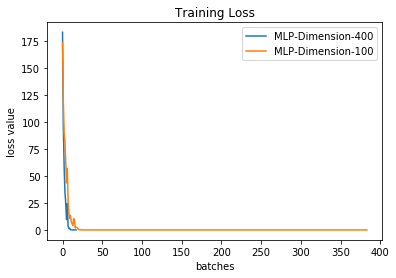

In [96]:
# plt.plot(loss_history, label='LSTM V1')
# plt.plot(loss_history2, label='LSTM V2')
plt.plot(loss_history3, label='MLP-Dimension-400')
plt.plot(loss_history3_2, label='MLP-Dimension-100')

plt.legend(loc='upper right')
plt.ylabel('loss value')
plt.xlabel('batches')
plt.title("Training Loss")
# plt.ylim(0, 10)

plt.show()

Higher the dimensions in MLP Controller faster it converges to a lower error rate

#### Plot of MLP with different learning rate

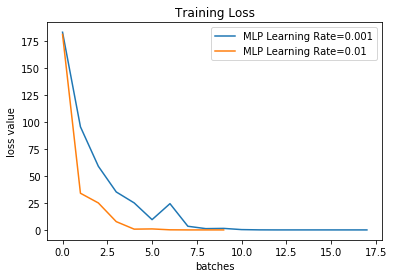

In [97]:
# plt.plot(loss_history, label='LSTM V1')
# plt.plot(loss_history2, label='LSTM V2')
plt.plot(loss_history3, label='MLP Learning Rate=0.001')
plt.plot(loss_history3_3, label='MLP Learning Rate=0.01')

plt.legend(loc='upper right')
plt.ylabel('loss value')
plt.xlabel('batches')
plt.title("Training Loss")
# plt.ylim(0, 10)

plt.show()

#### Plot of different type of controller

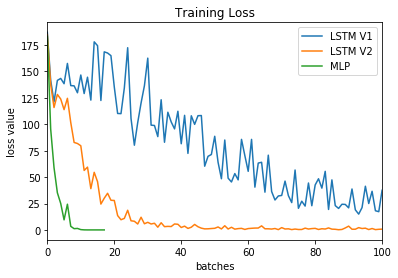

In [98]:
plt.plot(loss_history, label='LSTM V1')
plt.plot(loss_history2, label='LSTM V2')
plt.plot(loss_history3, label='MLP')

plt.legend(loc='upper right')
plt.ylabel('loss value')
plt.xlabel('batches')
plt.title("Training Loss")
# plt.ylim(0, 10)
plt.xlim(0, 100)

plt.show()

It takes longer for LSTM model to converge than compared to MLP. Also LSTM V2 converges faster than V1 because of higher trainable parameters

## Test Model

#### Test Model

In [0]:
def testModel(inputSet, targetSet, gates, nramController, readMemory, writeMemory, epochs=2, max_timesteps=5, debug=False):
  loss_history = []

  for (input_data, target_data) in zip(inputSet, targetSet):
        cost = 0
        cum_prob_complete = 0
        prob_incomplete = 1

        registers = tf.concat([registerValueModule(0), registerValueModule(0), registerValueModule(0)], axis=0)
        registers = tf.reshape(registers, shape=[1, registers.shape[0], registers.shape[1]])
        memory = input_data

        for timestep in range(max_timesteps):
          register_data = []
          registersNumpy = registers.numpy()
          for i in range(registersNumpy.shape[1]):
            register_data.append(registersNumpy[0][i][0])
          register_data = np.array([register_data], dtype="float32")

          gateControllerOutput, registerControllerOutput, status = nramController(register_data)
          output_registers, memory = runTimeStepNN(gates, registers, memory, readMemory, writeMemory, gateControllerOutput, registerControllerOutput)

          if debug:
            print("\n\noutputs")
            print("Timestep: ",timestep)

            for values in gateControllerOutput:
              print("\n Gate Controller vals:")
              for v in values:
                print(v.numpy())
            
            for i in range(len(registerControllerOutput)):
              print("\nRegister controller ", i)
              print(registerControllerOutput[i].numpy())

            print("\nOutput registers")
            print(output_registers.numpy())
            
            print("\nOutput memory")
            print(memory.numpy())

          registers = output_registers
          if timestep == max_timesteps:
              prob_complete = 1 - cum_prob_complete
          else:
              prob_complete = status * prob_incomplete

          # Update the probability that the computation isn't complete
          prob_incomplete *= 1 - status

          # Accumulate the probability that a result has been produced.
          cum_prob_complete += prob_complete

          # Cost for this timestep.
          unscaled_cost = 0

          # Add epsilon to every log to avoid having inf in costs.
          epsilon = tf.constant(1e-35, shape=[output_registers.shape[0], output_registers.shape[2]])

          for r in range(memory.shape[0]):
              y = target_data[r]
              yPredicted = memory[r]
              loss = tf.math.reduce_sum((y * tf.math.log(tf.math.add(yPredicted, epsilon))), axis=1)
              unscaled_cost += tf.reshape(loss, [loss.shape[0], 1])

          scaled_cost = prob_complete * unscaled_cost
          cost -= scaled_cost
        final_cost = tf.math.reduce_sum(cost)

        # store the loss history 
        loss_history.append(final_cost.numpy())
        if debug:
          print("final cost:", final_cost.numpy())
  return loss_history, memory

#### Testing - MLP - Dimension-400, Learning rate = 0.001

In [0]:
## Test
test_loss_history3, outputMemory = testModel(inputTestSet, targetTestSet, gates, model3, readMemory, writeMemory)

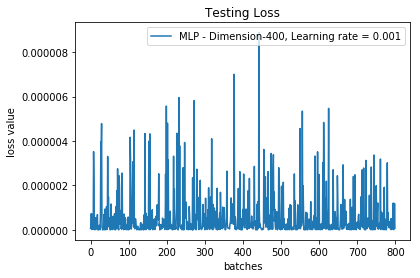

In [102]:
# plt.plot(loss_history, label='LSTM V1')
# plt.plot(loss_history2, label='LSTM V2')
plt.plot(test_loss_history3, label='MLP - Dimension-400, Learning rate = 0.001')

plt.legend(loc='upper right')
plt.ylabel('loss value')
plt.xlabel('batches')
plt.title("Testing Loss")
# plt.ylim(0, 10)

plt.show()

#### Testing - MLP - Dimension-100, Learning rate = 0.001

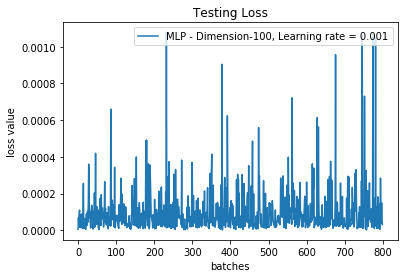

In [103]:
## Test
test_loss_history3_2, outputMemory = testModel(inputTestSet, targetTestSet, gates, model3_2, readMemory, writeMemory)

# plt.plot(loss_history, label='LSTM V1')
# plt.plot(loss_history2, label='LSTM V2')
plt.plot(test_loss_history3_2, label='MLP - Dimension-100, Learning rate = 0.001')

plt.legend(loc='upper right')
plt.ylabel('loss value')
plt.xlabel('batches')
plt.title("Testing Loss")
# plt.ylim(0, 10)

plt.show()

#### Testing - MLP - Dimension-400, Learning rate = 0.01

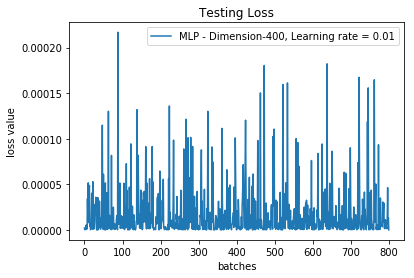

In [104]:
## Test
test_loss_history3_3, outputMemory = testModel(inputTestSet, targetTestSet, gates, model3_3, readMemory, writeMemory)

# plt.plot(loss_history, label='LSTM V1')
# plt.plot(loss_history2, label='LSTM V2')
plt.plot(test_loss_history3_3, label='MLP - Dimension-400, Learning rate = 0.01')

plt.legend(loc='upper right')
plt.ylabel('loss value')
plt.xlabel('batches')
plt.title("Testing Loss")
# plt.ylim(0, 10)

plt.show()

No handles with labels found to put in legend.


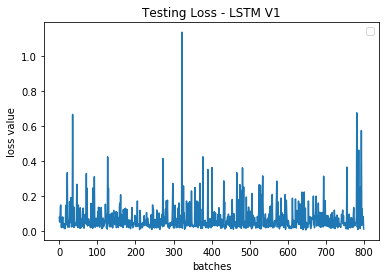

In [105]:
## Test
test_loss_history1, outputMemory = testModel(inputTestSet, targetTestSet, gates, model, readMemory, writeMemory)

plt.plot(test_loss_history1)

plt.legend(loc='upper right')
plt.ylabel('loss value')
plt.xlabel('batches')
plt.title("Testing Loss - LSTM V1")
# plt.ylim(0, 10)

plt.show()

No handles with labels found to put in legend.


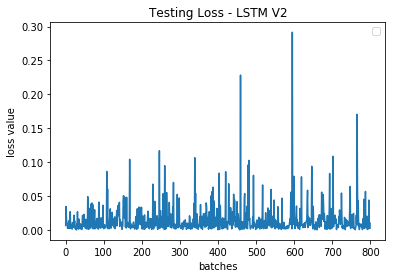

In [106]:
## Test
test_loss_history2, outputMemory = testModel(inputTestSet, targetTestSet, gates, model2, readMemory, writeMemory)

plt.plot(test_loss_history2)

plt.legend(loc='upper right')
plt.ylabel('loss value')
plt.xlabel('batches')
plt.title("Testing Loss - LSTM V2")
# plt.ylim(0, 10)

plt.show()

### Test model larger array size MLP

In [107]:
## Generate dataset
inputSet2, targetSet2 = dataset6(500, M)


index:
[1 0 2]
10
5
14

index:
[0 2 1]
1
15
11
[11 14 17  0 10  5 14  1 15 11  0  0  0  0  0  0  0  0  0  0]
[11 14 17  0 10  5 14  1 15 11  0  5  1  0 10 11  0 14 15  0]

index:
[0 1 2]
1
13
16

index:
[2 0 1]
19
1
8
[11 14 17  0  1 13 16 19  1  8  0  0  0  0  0  0  0  0  0  0]
[11 14 17  0  1 13 16 19  1  8  0  1  1  0 13  8  0 16 19  0]

index:
[2 0 1]
14
6
11

index:
[0 1 2]
4
9
15
[11 14 17  0 14  6 11  4  9 15  0  0  0  0  0  0  0  0  0  0]
[11 14 17  0 14  6 11  4  9 15  0  6  4  0 11  9  0 14 15  0]

index:
[0 2 1]
2
16
13

index:
[0 1 2]
6
10
14
[11 14 17  0  2 16 13  6 10 14  0  0  0  0  0  0  0  0  0  0]
[11 14 17  0  2 16 13  6 10 14  0  2  6  0 13 10  0 16 14  0]

index:
[2 1 0]
15
10
2

index:
[2 1 0]
17
7
5
[11 14 17  0 15 10  2 17  7  5  0  0  0  0  0  0  0  0  0  0]
[11 14 17  0 15 10  2 17  7  5  0  2  5  0 10  7  0 15 17  0]

index:
[2 1 0]
17
7
5

index:
[0 1 2]
5
8
15
[11 14 17  0 17  7  5  5  8 15  0  0  0  0  0  0  0  0  0  0]
[11 14 17  0 17  7  5  5  8 15  0  

No handles with labels found to put in legend.


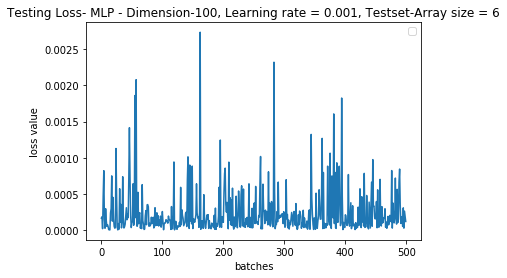

In [108]:
## Test
test_loss_history3_2, outputMemory = testModel(inputSet2, targetSet2, gates, model3_2, readMemory, writeMemory)
plt.plot(test_loss_history3_2, label='')

plt.legend(loc='upper right')
plt.ylabel('loss value')
plt.xlabel('batches')
plt.title("Testing Loss- MLP - Dimension-100, Learning rate = 0.001, Testset-Array size = 6")
# plt.ylim(0, 10)

plt.show()

No handles with labels found to put in legend.


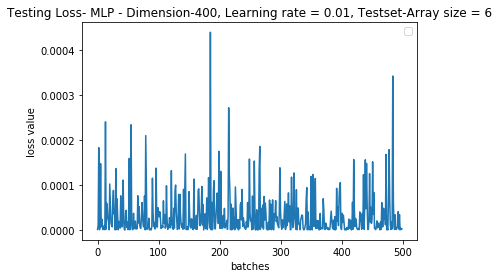

In [109]:
## Test
test_loss_history3_3, outputMemory = testModel(inputSet2, targetSet2, gates, model3_3, readMemory, writeMemory)
plt.plot(test_loss_history3_3, label='')

plt.legend(loc='upper right')
plt.ylabel('loss value')
plt.xlabel('batches')
plt.title("Testing Loss- MLP - Dimension-400, Learning rate = 0.01, Testset-Array size = 6")
# plt.ylim(0, 10)

plt.show()

No handles with labels found to put in legend.


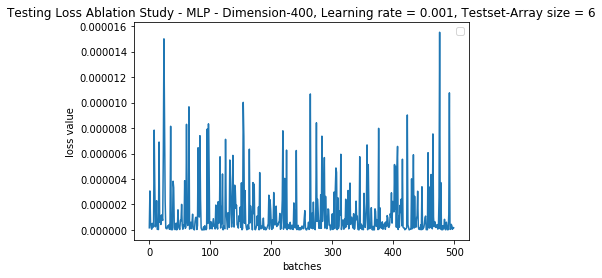

In [110]:
## Test
test_loss_history3, outputMemory = testModel(inputSet2, targetSet2, gates, model3, readMemory, writeMemory)
plt.plot(test_loss_history3, label='')

plt.legend(loc='upper right')
plt.ylabel('loss value')
plt.xlabel('batches')
plt.title("Testing Loss Ablation Study - MLP - Dimension-400, Learning rate = 0.001, Testset-Array size = 6")
# plt.ylim(0, 10)

plt.show()

### Test Different Size of array from train dataset

No handles with labels found to put in legend.


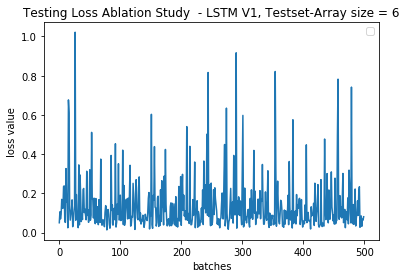

In [111]:
## Test
test_loss_history1, outputMemory = testModel(inputSet2, targetSet2, gates, model, readMemory, writeMemory)

plt.plot(test_loss_history1)

plt.legend(loc='upper right')
plt.ylabel('loss value')
plt.xlabel('batches')
plt.title("Testing Loss Ablation Study  - LSTM V1, Testset-Array size = 6")
# plt.ylim(0, 10)

plt.show()

No handles with labels found to put in legend.


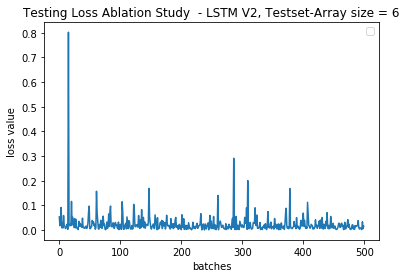

In [112]:
## Test
test_loss_history2, outputMemory = testModel(inputSet2, targetSet2, gates, model2, readMemory, writeMemory)

plt.plot(test_loss_history2)

plt.legend(loc='upper right')
plt.ylabel('loss value')
plt.xlabel('batches')
plt.title("Testing Loss Ablation Study  - LSTM V2, Testset-Array size = 6")
# plt.ylim(0, 10)

plt.show()

### Debug

In [113]:
np.argmax(inputTestSet[0], axis=1)

array([ 9, 12, 15,  0, 15,  5, 11, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0])

In [114]:
np.argmax(targetTestSet[0], axis=1)

array([ 9, 12, 15,  0, 15,  5, 11, 16,  0,  5,  0,  0, 11,  0,  0, 15, 16,
        0,  0,  0])

In [115]:
## Test
test_loss_history2_, outputMemory = testModel([inputTestSet[0]], [targetTestSet[0]], gates, model2, readMemory, writeMemory, debug=True)



outputs
Timestep:  0

 Gate Controller vals:
[[0.59349394 0.27711508 0.12939098]]

 Gate Controller vals:
[[0.27320898 0.25195098 0.22691992 0.24792007]]

 Gate Controller vals:
[[0.19028601 0.21066786 0.20179595 0.19902714 0.19822305]]

 Gate Controller vals:
[[0.16249709 0.14865586 0.17497613 0.1683914  0.17551686 0.16996264]]

 Gate Controller vals:
[[0.07482822 0.07482823 0.07482824 0.3432239  0.07482819 0.07482819
  0.28263497]]

 Gate Controller vals:
[[0.12765603 0.12935993 0.12518959 0.12515341 0.10989267 0.12053891
  0.13461848 0.12759104]]
[[0.13255247 0.12064619 0.13968885 0.10639384 0.12816261 0.12520778
  0.12367147 0.12367682]]

 Gate Controller vals:
[[0.10315267 0.09943179 0.12246731 0.11853434 0.11132441 0.10880745
  0.1134012  0.12147643 0.10140444]]
[[0.10404272 0.11911014 0.09788412 0.11275271 0.11925451 0.10754892
  0.12116282 0.10465392 0.11359014]]

 Gate Controller vals:
[[0.10472646 0.15329662 0.2242913  0.22429134 0.04889908 0.04889903
  0.04889903 0.0488991

In [116]:
np.argmax(outputMemory, axis=1)

array([ 9,  1, 15,  1, 15,  5, 11, 16,  0,  0,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  0])

No handles with labels found to put in legend.


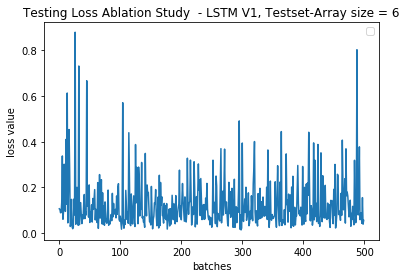

In [121]:
## Test
test_loss_history1, outputMemory = testModel(inputSet2, targetSet2, gates, model, readMemory, writeMemory)

plt.plot(test_loss_history1)

plt.legend(loc='upper right')
plt.ylabel('loss value')
plt.xlabel('batches')
plt.title("Testing Loss Ablation Study  - LSTM V1, Testset-Array size = 6")
# plt.ylim(0, 10)

plt.show()

## Bucket Sort

https://www.geeksforgeeks.org/bucket-sort-2/

In [117]:
# Python3 program to sort an array 
# using bucket sort 
def insertionSort(b): 
	for i in range(1, len(b)): 
		up = b[i] 
		j = i - 1
		while j >=0 and b[j] > up: 
			b[j + 1] = b[j] 
			j -= 1
		b[j + 1] = up	 
	return b	 
			
def bucketSort(x, M): 
	arr = [] 
	slot_num = 3 # 10 means 10 slots, each 
				# slot's size is 0.1 
	for i in range(slot_num): 
		arr.append([]) 
		
	# Put array elements in different buckets 
	for j in x: 
		index_b = int((slot_num * j)/M) 
		arr[index_b].append(j) 
	
	# Sort individual buckets 
	for i in range(slot_num): 
		arr[i] = insertionSort(arr[i]) 
	
	# concatenate the result 
	k = 0
	for i in range(slot_num): 
		for j in range(len(arr[i])): 
			x[k] = arr[i][j] 
			k += 1
	return x, arr

# Driver Code 
x = [1, 4, 3, 6, 
	2, 5, 7, 9, 8] 
print("Sorted Array is") 
print(bucketSort(x, 10))


# Driver Code 
x = [1, 14, 13, 6, 
	12, 15, 7, 19, 8] 
print("Sorted Array is") 
print(bucketSort(x, 20))

Sorted Array is
([1, 2, 3, 4, 5, 6, 7, 8, 9], [[1, 2, 3], [4, 5, 6], [7, 8, 9]])
Sorted Array is
([1, 6, 7, 8, 12, 13, 14, 15, 19], [[1, 6], [7, 8, 12, 13], [14, 15, 19]])
